In [1]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
sns.set()
sns.set_style("darkgrid")

# Welcome to Machine Learning - Week 2
Instructor - Daniel Wiesenfeld

**Today's Lecture:**
- Encoding non numeric data
- Standardization & Scaling
- Variance-Bias Tradeoff / Overfitting & Underfitting
- Dimensionality Reduction & Feature Selection
- Train/Test Splits & Cross Validation

## Encoding Data
ML Models need numbers to work. Raw text, dates, and other data types need to be encoded

You need to be aware of these four data types:

### Data Types
- Ratio Data
- Interval Data
- Ordinal Data
- Categorical Data

Another data type that can be either Interval or Ordinal is:
- Cyclic Data

#### Ratio Data

- Ratio data is numeric data with a True 0
- Any math done on Ratio data is valid (it's called ratio because ratios are valid, e.g. can say one value is half of another). 
- Most real world measurements, amounts, etc. are ratio data
- Examples: height, weight, bank balance
- Ratio Data can be used as is

#### Interval Data

- Interval data is numeric data with no true 0 point
- Can do addition and subtraction, but not multiplication, devision or others
- Called interval because only the distance between values matter (and the direction), not the values themselves
- Examples: temperature (except Kelvin), dates
- Generally interval data can be used as is, but keep in mind what it is when doing transformations

#### Ordinal Data

- Ordinal data has a defined order, but not a quantifiable difference between values
- It is valid to say that one value is greater than equal to or less than another value, but other than that no math is valid
- Examples include level of education (high school, college, masters), olympic medals (bronze, silver, gold), etc.
- These need to be encoded as numbers to be used in a model.

How would you classify the number of stars a product has on Amazon? Interval, Ordinal, Ratio - why?

#### Categorical (Nominal) Data

- Categorical data has no associated quantitative value.
- The only valid mathematical operations between values are testing for equality or inequality
- Examples: color, type of car, male or female, etc.
- These need to be encoded as numbers to be used in a model.

How would you classify T shirt size - small, medium, large, XL, etc? (does how you're using the data matter?)

#### Cyclic Data

- Cyclic Data is data that represents a repeating cycle.
- The data can be interval (quantity of distance betweeen points is meaningful) or ordinal (just the cyclic order matters)
- Examples: days of week, time of day, month of year
- These are sometimes treated as regular ordinal or interval data points, but there is a potentially better way to encode.

When might it make sense to ignore the cyclic nature of a field?

### Encoding Methods
- Integer
- One Hot
- Ordinal

#### Integer/Ordinal Encoding:
- Map every value in ordinal or categorical field to an integer
- e.g. {small, medium, large} $\rightarrow$ {0, 1, 2}
- pros: 
    - simple
    - does not add features
- cons
    - mapping to integers imposes both an order (not a problem for ordinal) and a value, which may not be true
    - the specific numbers mapped to categories and can impact the way your model works
- this method is generally better for ordinal than for categorical

In [24]:
pd.DataFrame({('Original', 'size'): ['small', 'medium', 'large'], ('', ''): ['\u2192', '\u2192', '\u2192'], ('Integer Encoded', 'size'): [0, 1, 2]}).style\
    .hide(axis="index").set_table_styles([dict(selector="th", props=[("text-align", "center")])])

Original,,Integer Encoded
size,,size
small,→,0
medium,→,1
large,→,2


How to do this in Scikit-learn:

In [3]:
from sklearn.preprocessing import OrdinalEncoder

df = pd.DataFrame({'size': ['small', 'medium', 'small', 'large', 'large'],
                   'color': ['red', 'blue', 'blue', 'blue', 'red']})

encoder = OrdinalEncoder()
encoder.fit(df)

pd.DataFrame(columns = np.hstack((df.columns,[""] , encoder.get_feature_names_out())), 
             data = np.hstack((df, [['\u2192']]*5, encoder.transform(df).astype(int)))
).style.hide(axis="index")

size,color,,size,color
small,red,→,2,1
medium,blue,→,1,0
small,blue,→,2,0
large,blue,→,0,0
large,red,→,0,1


#### One-Hot Encoding:
- create a binary {1, 0} feature for each value of the ordinal or categorical field
- Pros: 
    - does not impose any numerical value assumptions
    - order of values does not matter (good for categorical)
- Cons:
    - adds many more features
    - loses order (potential problem for ordinal values)

In [4]:
pd.DataFrame({('Original', 'size'): ['small', 'medium', 'large'], 
              ('', ''): ['\u2192', '\u2192', '\u2192'],
              ('One-Hot Encoded', 'small'): [1, 0, 0], 
              ('One-Hot Encoded', 'medium'): [0, 1, 0], 
              ('One-Hot Encoded', 'large'): [0, 0, 1]}).style\
    .hide(axis="index")\
    .set_table_styles([dict(selector="th", props=[("text-align", "center")])])

#### Can we drop a column in One-Hot Encoding?

In [5]:
pd.DataFrame({('Original', 'size'): ['small', 'medium', 'large'], 
              ('', ''): ['\u2192', '\u2192', '\u2192'],
              ('One-Hot Encoded', 'medium'): [0, 1, 0], 
              ('One-Hot Encoded', 'large'): [0, 0, 1]}).style\
    .hide(axis="index")\
    .set_table_styles([dict(selector="th", props=[("text-align", "center")])])

There is still enough information in the table above to distinguish between each unique class, so we don't technically need all three columns. Generally, if there are $c$ categories, we need $c-1$ columns to one-hot encode it.

When is it a good idea to drop an extra column, and when is it a good idea not to?

#### How to do One-Hot Enoding in Scikit-learn:

In [6]:
from sklearn.preprocessing import OneHotEncoder

df = pd.DataFrame({'size': ['small', 'medium', 'small', 'large', 'large'],
                   'color': ['red', 'blue', 'blue', 'blue', 'red']})

encoder = OneHotEncoder()
encoder.fit(df)

pd.DataFrame(columns = np.hstack((df.columns,[""] , encoder.get_feature_names_out())), 
             data = np.hstack((df, [['\u2192']]*5, encoder.transform(df).toarray().astype(int)))
).style.hide(axis="index")

size,color,,size_large,size_medium,size_small,color_blue,color_red
small,red,→,0,0,1,0,1
medium,blue,→,0,1,0,1,0
small,blue,→,0,0,1,1,0
large,blue,→,1,0,0,1,0
large,red,→,1,0,0,0,1


#### Multi-Label One-Hot Encoding (an alternative for Ordinal data):
- create a binary {1, 0} feature for each value of the ordinal or categorical field
- assign a 1 in each column corresponding to a value less than or equal to the ordinal value (or the reverse)
- drop the lowest value (all 1's)
- Pros: 
    - encodes the ordinal nature of the data
    - does not impose a quantitative value
- Cons:
    - adds many more features than ingeger encoding
    - no real con vs. one-hot encoding other than it is a custom operation (no scikit-learn library for this)

In [7]:
pd.DataFrame({('Original', 'education'): ['high school', 'bachelors', 'masters', 'phd'], 
              ('', ''): ['\u2192', '\u2192', '\u2192', '\u2192'],
              ('One-Hot Encoded', 'bachelors'): [0, 1, 1, 1],
              ('One-Hot Encoded', 'masters'): [0, 0, 1, 1],
              ('One-Hot Encoded', 'phd'): [0, 0, 0, 1]}).style\
    .hide(axis="index")\
    .set_table_styles([dict(selector="th", props=[("text-align", "center")])])

#### Cyclic Encoding
- How can we encode cyclic data such that values at either end are close to one another?
- For example, if we encode weekdays as Sunday = 1, Monday = 2, ... Saturday = 7, it will seeem to our model that Sunday and Saturday are 6 days apart, when they are actually only 1 day apart
- The answer is to use the properties of a circle
- Map each point to a point on a circle (or to an angle) and compute the sine and cosine of that angle/point
- So for weekdays, we can map Sunday, ..., Saturday to ${0, \frac{\tau}{7}, \frac{2\tau}{7},\ldots, \frac{6\tau}{7}}$, where $\tau = 2\pi$
- Then for each point, we compute the sine and cosine.

\* https://tauday.com/tau-manifesto

In [10]:
pd.DataFrame({'weekday': ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], 
              '': ['\u2192'] * 7,
              'angle': [0, '\u03C4 / 7'] + [str(x) + '\u03C4  7' for x in range(2, 7)],
              ' ': ['\u2192'] * 7,
              'sine': [np.sin(x * 2 * np.pi / 7) for x in range(7)],
              'cosine': [np.cos(x * 2 * np.pi / 7) for x in range(7)]
             }).style.hide(axis="index")

weekday,,angle,,sine,cosine
Sunday,→,0,→,0.000000,1.000000
Monday,→,τ / 7,→,0.781831,0.623490
Tuesday,→,2τ 7,→,0.974928,-0.222521
Wednesday,→,3τ 7,→,0.433884,-0.900969
Thursday,→,4τ 7,→,-0.433884,-0.900969
Friday,→,5τ 7,→,-0.974928,-0.222521
Saturday,→,6τ 7,→,-0.781831,0.623490


How does this solve the cyclic distance problem?

## Standardizing & Scaling Data

Why do we want to standardize & scale data?
- When working with vastly different scales, some models will be biased toward the data with greater scales
- When working with gradient descent/neural networks, we typically want to keep numbers relatively small

### Max Scaling

- Divide every value by the maximum value.
- Scales values to $[0, 1]$ if all positive, or $[-1, 0]$ if all negative, or $[-1, 1]$ if mixed signs
- Good when we want to maintain 0 as minimum value (if all positive) or when we want to keep positive numbers positive and negative numbers negative, not necessarily symmetric around 0

In [11]:
from sklearn.preprocessing import MaxAbsScaler

df = pd.DataFrame({"net worth": [-530462, 23012405, 76342, 0]})

scaler = MaxAbsScaler().fit(df)

pd.DataFrame({"net worth ($)": [f'{x:,}' for x in df['net worth']], 
              '': ['\u2192'] * 4,
              'max_scaled': scaler.transform(df)[:, 0],
              }).style.hide(axis="index")

net worth ($),,max_scaled
"-530,462",→,-0.023051
"23,012,405",→,1.000000
"76,342",→,0.003317
0,→,0.000000


### Min-Max Scaling

- Subtract the minimum from every value and divide the difference by the difference between the maximum and minimum values.
- $x_{\text{min_max_scaled}} = \frac{x - x_{min}}{x_{max} - x_{min}}$
- Scales values to $[0, 1]$
- Good when numbers are clustered far from 0, or if we don't care about maintaining the sign

In [12]:
from sklearn.preprocessing import MinMaxScaler

df = pd.DataFrame({"flight_distance": [5462, 230, 7342, 978]})

scaler = MinMaxScaler().fit(df)

pd.DataFrame({"flight distance (miles)": [f'{x:,}' for x in df['flight_distance']], 
              '': ['\u2192'] * 4,
              'min_max_scaled': scaler.transform(df)[:, 0],
              }).style.hide(axis="index")

flight distance (miles),,min_max_scaled
"5,462",→,0.735658
230,→,0.000000
"7,342",→,1.000000
978,→,0.105174


### Standard Scaling

- Subtract the mean from every value and divide by the standard deviation.
- $x_{\text{standard_scaled}} = \frac{x - \bar{x}}{s_x}$
- Scales values to $(-\infty, \infty)$, but you can expect the vast majority to fill within a few standard deviations of the mean, 0
- Good for any model that likes data to look like a Standard Normal Distribution

In [13]:
from sklearn.preprocessing import StandardScaler

df = pd.DataFrame({"height_inches": [63, 72, 75, 60, 68, 70]})

scaler = StandardScaler().fit(df)

pd.DataFrame({"height_inches": [63, 72, 75, 60, 68, 70], 
              '': ['\u2192'] * 6,
              'standard_scaled': scaler.transform(df)[:, 0],
              }).style.hide(axis="index")

height_inches,,standard_scaled
63,→,-0.974355
72,→,0.779484
75,→,1.364097
60,→,-1.558968
68,→,0.000000
70,→,0.389742


### Robust Scaling

- Similar to Standard Scaling, but better if there are outliers
- Subtract the median from every value and divide by the IQR (inter-quartile-range: 75th percentile - 25th percentile).
- Scales values to $(-\infty, \infty)$, but you can expect the vast majority to fill within a few standard deviations of the mean, 0
- Good for data with outliers

In [14]:
from sklearn.preprocessing import RobustScaler

df = pd.DataFrame({"height_inches": [63, 72, 75, 60, 68, 70, 39]})

scaler = RobustScaler().fit(df)

pd.DataFrame({"height_inches": [63, 72, 75, 60, 68, 70, 39], 
              '': ['\u2192'] * 7,
              'robust_scaled': scaler.transform(df)[:, 0],
              }).style.hide(axis="index")

height_inches,,robust_scaled
63,→,-0.526316
72,→,0.421053
75,→,0.736842
60,→,-0.842105
68,→,0.000000
70,→,0.210526
39,→,-3.052632


## Important Warning!

Scaling Should only be fitted on TRAINING DATA. If you include Test/Validation Data when fitting your scaler, you will be leaking data into your model and it will make the results look better than it's true potential generalizable performance

## Outliers
- We're not going to spend much time on this, but it's important to think about when you should keep, remove, or otherwise handle outliers in your data

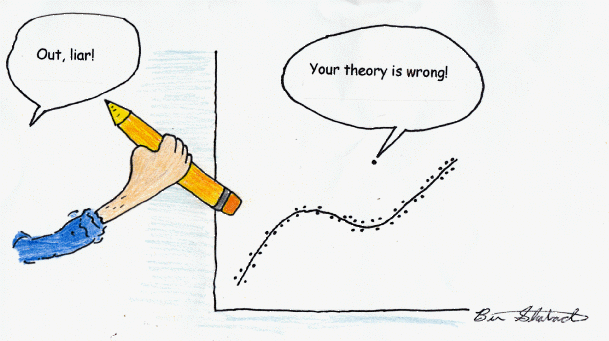
source: https://davidmlane.com/ben/cartoons.html

## Bias-Variance Tradeoff

- Fundamental concept in machine learning and statistics
- Need to balancing two types of error: Bias and Variance
- We want to reduce both, but often reducing one increases the other
- Key to improving model performance and generalization

### What is Bias?

- Error from simplifying the assumptions made in a model.
- High bias can cause underfitting:
- Model is too simple and overlooks key trends.
- Example: Linear regression missing nonlinear patterns.
- When a model has high Bias it will not perform will **even on the training data**

### What is Variance?

- Error from model sensitivity to small fluctuations in data.
- High variance can cause overfitting
- Model is too complex, capturing noise instead of signal.
- Example: Deep neural networks fitting to random noise.
- When a model has high variance, it will not perform well **on the testing data**
- A big degradation of performance between training and testing data is a good indicator of high variance

### The Tradeoff

- High Bias, Low Variance:
- Overly simple models that fail to capture complex data patterns.
- Consistent but inaccurate predictions.
- Low Bias, High Variance:
- Overly complex models sensitive to training data specifics.
- Accurate on training data but poor on unseen data.

### Managing the Tradeoff

- Selecting the right model complexity.
- Utilizing regularization and pruning techniques.
- Implementing cross-validation to assess model performance on unseen data.

In [15]:
np.random.seed(18)

x = 5 * np.random.random(100) - 1.5
y =  x ** 2 + np.random.normal(0, 1, 100)
group = np.random.choice(['train', 'test'], p = [0.7, 0.3], size = 100)
df = pd.DataFrame({'x': x, 'y': y, 'group': group})

In [16]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

r2s = {}

def gen_preds(df, degree=2, name = 'Balanced Model'):
    poly = PolynomialFeatures(degree)
    x_train = poly.fit_transform(df[df['group']=='train'][['x']])
    reg = LinearRegression().fit(x_train, df[df['group'] == 'train']['y'])
    df[name] = reg.predict(poly.transform(df[['x']]))
    r2_train = reg.score(x_train, df[df['group'] == 'train']['y'])
    r2_test = reg.score(poly.transform(df[df['group']=='test'][['x']]), df[df['group']=='test']['y'])
    r2s[name] = [r2_train, r2_test]
    return df

In [17]:
df = df.pipe(gen_preds, degree = 1, name = 'Underfitted Model')\
    .pipe(gen_preds, degree = 23, name = 'Overfitted Model')\
    .pipe(gen_preds, degree = 2, name = 'Balanced Model')

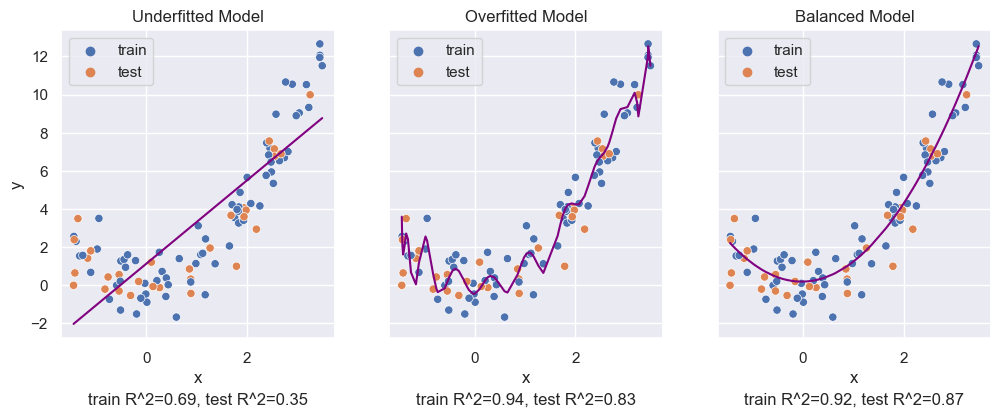

In [18]:
fig, axs = plt.subplots(ncols=3, sharey = True, figsize=(12, 4))
for i, (model_name, r2) in enumerate(r2s.items()):
    axs[i].set_title(model_name)
    sns.scatterplot(df, x='x', y='y', hue = 'group', ax = axs[i])
    sns.lineplot(df, x='x', y = model_name, ax = axs[i], color = 'purple')
    text = f"train R^2={r2[0]:.2f}, test R^2={r2[1]:.2f}"
    axs[i].text(0.5, -0.2, text, horizontalalignment='center', verticalalignment='center', transform=axs[i].transAxes)

## Feature Selection & Dimensionality Reduction

Methods to reduce overfitting as well as speeding up model training and prediction

### Dimensionality Reduction
- Definition: Reducing the number of dimensions by transforming or combining features
- Methods:
    - Principal Component Analysis (PCA): Unsupervised Method that combines and transforms features into uncorrelated new ones ranked from greatest to least variance. Those with the least variance can often be dropped improving model performance
    - Linear Discriminant Analysis (LDA): Supervised method (for classification models) that transforms features into a new smaller set of features that are ranked in order from maximum to minimum separation of classes
    - Autoencoders: Neural networks that learn compressed data representations.
    - Use Cases: When features are highly correlated or when data dimensionality is too high

### Feature Selection
- Definition: Selecting a subset of relevant features for model training
- Methods:
    - Embedded Methods: Algorithms with built-in feature selection (e.g., Lasso, Decision Tree Models)
    - Filter Methods: Use statistical tests to select features (e.g., correlation, Chi-squared test) based on their individual relationship with the target
    - Wrapper Methods: Use algorithms to evaluate the performance of feature subsets (e.g., Recursive Feature Elimination)
- Use Cases: When specific features contribute directly to predicting the target variable
    
Why is feature selection a hard problem?

### An Example:
Let's took a look at using Logistic Regression to predict whether a breast tumor is cancerous

In [19]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X, y = load_breast_cancer(return_X_y = True, as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)
clf = LogisticRegression(max_iter = 10000)
clf.fit(X_train, y_train)
print(f"features: {X_train.shape[1]},",
      f"train accuracy: {clf.score(X_train, y_train):.4f},", 
      f"test accuracy: {clf.score(X_test, y_test):.4f}")

features: 30, train accuracy: 0.9626, test accuracy: 0.9123


### LDA
Now let's use LDA to reduce the dimensionality of X from 30 to 1 (LDA reduces dimensionality the lesser of classes - 1 or features - 1), as there are only two classes, this will be 1 feature. Then we'll refit the model. (Note: you should always standardize features before using LDA because it expects equivalent variences)

https://youtu.be/azXCzI57Yfc?si=2sMrvcew_BPfkhph

In [26]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
scaler = StandardScaler()
lda = LinearDiscriminantAnalysis()
X_train_lda = lda.fit_transform(scaler.fit_transform(X_train), y_train)
X_test_lda = lda.transform(scaler.transform(X_test))
clf.fit(X_train_lda, y_train)

print(f"features: {X_train_lda.shape[1]},",
      f"train accuracy: {clf.score(X_train_lda, y_train):.4f},",
      f"test accuracy: {clf.score(X_test_lda, y_test):.4f}")

features: 1, train accuracy: 0.9692, test accuracy: 0.9825


### RFE
Now let's use RFE to recursively eliminate features until we're left with 15, and refit the model. (Note: you should always standardize features before using RFE, because RFE compares coefficients to eliminate features and they are only comparable if features are similarly scaled).

In [21]:
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rfe = RFE(clf, n_features_to_select = 15)
rfe.fit(scaler.fit_transform(X_train), y_train)

print(f"features: {rfe.n_features_},",
      f"train accuracy: {rfe.score(scaler.transform(X_train), y_train):.4f},",
      f"test accuracy: {rfe.score(scaler.transform(X_test), y_test):.4f}")

features: 15, train accuracy: 0.9846, test accuracy: 0.9561


### Questions to Consider

- Why do you think RFE did worse than LDA on the training set?
- Why do you think RFE did better than the full model on the testing set?
- Why do you think LDA did the best overall in this case?

### Comparing Reduction vs. Selection

- Dimensionality Reduction: Transforms features into a lower-dimensional space.
- Feature Selection: Chooses a subset of original features without transformation.

- Decision Criteria: Depends on model requirements, computational resources, and data characteristics.

## Cross Validation

- Definition: A statistical method used to estimate the skill of machine learning models
- Purpose: Ensures that the model is capable of performing well on unseen data
    - Avoids Overfitting: Ensures the model performs well on new, unseen data, not just on the training set
    - Model Validation: Provides a robust estimate of the model's performance
    - Parameter Tuning: Assists in selecting the best parameters for the model
- Partitionining the data into Training and Test sets is a form of cross validation, but that is often not robust enough
    - We may get "lucky" with our test data (the model happens to work well on it, but it actually does not generalize to unseen data)
    - By iteratively training, tuning, and retraining our model and then checking it on our test data over and over again, we essentially are using our test data for "training" our model

### K-Fold Cross-Validation: 

- Divides the dataset into K distinct folds or partitions of approximately equal size
- Uses each fold once as a validation set, while training a model on the remaining k-1 folds form the training set
- The performance of each of the k models is measured against their respective validation set
- The mean and variance of these k model performance metrics give us a good sense of how well the model will perform on unseen data
    - mean: primary comparison method when comparing to other models (if it's a measure of accuracy, higher is better)
    - variance: how robustly the model is generalizing. A high variance in model performance between folds indicates that the model is highly dependent on the specific training sample

### Special Cases of K-Fold Cross Validation
- Leave-One-Out (LOO): A special case of k-fold cross-validation where k equals the number of observations in the dataset.
- Stratified K-Fold: Variation of k-fold, used for classification tasks to maintain each class's ratio across each fold.

### Steps for Cross Validation
1. Split the dataset into multiple subsets (folds)
2. For each fold, fit the model on the training folds and validate it on the remaining fold
3. Repeat this process for each fold and collect each model's performance metric
4. Compute mean & variance (or standard deviation) of performance metrics

### When to Use Cross-Validation

- Model Selection: Comparing the performance of different models
- Feature Selection: Testing what collection of features work best
- Hyperparameter Tuning: Testing variations in non learnable model parameters
- Model Assessment: Estimating how well a model will generalize to an independent data set.
    - One practice is to hold out a test partition for final model assessment and do k-fold cross validation on the remaining training data to find the optimal set of features and hyperparameters for the model

### Advantages of Cross-Validation

Reliability: Offers more stability and accuracy than a single train-test split
Efficiency: Makes efficient use of a limited dataset, especially important in scenarios where the sample size is small

### Limitations of Cross-Validation

Computational Cost: Can be computationally expensive, especially with large datasets and complex models (due to this it is not typically done when training large neural networks)
Data Imbalance: Standard cross-validation methods can be biased in presence of unbalanced data

### Let's test out CV
We'll use it to select the best hyperparameters for a Random Forest Model

In [22]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

param_distributions = {
    'n_estimators': [i for i in range(5, 101)],
    'max_depth': [1, 3, 5],
    'min_samples_leaf': [1, 3, 5]
} 
rscv = RandomizedSearchCV(RandomForestClassifier(), param_distributions)
rscv.random_state = 4
rscv.fit(X_train, y_train)


print(f"selected_params: {rscv.best_params_},",
      f"train accuracy: {rscv.score(X_train, y_train):.4f},",
      f"test accuracy: {rscv.score(X_test, y_test):.4f}")

selected_params: {'n_estimators': 46, 'min_samples_leaf': 5, 'max_depth': 5}, train accuracy: 0.9846, test accuracy: 0.8947


Let's take a look at the CV results

In [23]:
pd.DataFrame(rscv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_leaf,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.108515,0.017242,0.007126,0.002651,83,5,1,"{'n_estimators': 83, 'min_samples_leaf': 5, 'm...",0.923077,0.934066,0.989011,0.912088,0.934066,0.938462,0.026556,8
1,0.028390,0.003214,0.002198,0.000400,22,3,3,"{'n_estimators': 22, 'min_samples_leaf': 3, 'm...",0.989011,0.934066,0.978022,0.934066,0.945055,0.956044,0.023051,4
2,0.056433,0.001352,0.003587,0.000810,46,5,5,"{'n_estimators': 46, 'min_samples_leaf': 5, 'm...",0.967033,0.956044,0.978022,0.923077,0.967033,0.958242,0.018906,1
3,0.076652,0.020104,0.003981,0.000032,71,1,1,"{'n_estimators': 71, 'min_samples_leaf': 1, 'm...",0.934066,0.934066,0.989011,0.901099,0.923077,0.936264,0.028991,9
4,0.052898,0.002574,0.003212,0.000395,45,1,3,"{'n_estimators': 45, 'min_samples_leaf': 1, 'm...",0.967033,0.934066,0.978022,0.934066,0.956044,0.953846,0.017582,5
5,0.046612,0.000336,0.002989,0.000020,41,1,3,"{'n_estimators': 41, 'min_samples_leaf': 1, 'm...",0.967033,0.945055,0.978022,0.934066,0.945055,0.953846,0.016150,5
6,0.090031,0.009930,0.004804,0.000402,59,1,5,"{'n_estimators': 59, 'min_samples_leaf': 1, 'm...",0.978022,0.945055,0.978022,0.945055,0.945055,0.958242,0.016150,1
7,0.081219,0.007133,0.005418,0.000483,77,1,1,"{'n_estimators': 77, 'min_samples_leaf': 1, 'm...",0.945055,0.934066,0.989011,0.890110,0.923077,0.936264,0.032151,9
8,0.039574,0.005302,0.002800,0.000750,36,3,1,"{'n_estimators': 36, 'min_samples_leaf': 3, 'm...",0.956044,0.934066,0.989011,0.901099,0.923077,0.940659,0.029974,7
9,0.098835,0.007733,0.004826,0.000395,69,1,5,"{'n_estimators': 69, 'min_samples_leaf': 1, 'm...",0.978022,0.956044,0.978022,0.934066,0.945055,0.958242,0.017582,1
